# Carpet

`Carpet` is a sub-module of `CactusTool`. This modular main processes output of Thorn `Carpet`. To reduce the potential bug, this part will be written as simple as possible. These class also not depend on the `CactusTool` modular and can be used alone.

Thorn `Carpet` provides three different I/O methods, namely `CarpetIOScalar`, `CarpetIOHDF5`, and `CarpetIOASCII`. Where `CarpetIOScalar` is time series while `CarpetIOHDF5`, and `CarpetIOASCII` is gird function. `CarpetIOHDF5` can read the corresponding data according to the header. However, `CarpetIOASCII` will read all data at once. This is not an efficient way for extremely large data files. So we recommend 1-D grid function use `CarpetIOASCII` while 2-D or 3_D use `CarpetIOHDF5`.

`Carpet` module main contain three base class `CarpetIOScalar`, `CarpetIOHDF5`, and `CarpetIOASCII`. We deal with them separately, because their data structure is completely different. These class only return part of the dataset, given time, refinement level and component. We don't recommend using all the data when drawing. Because the amount of simulation data is too large, this is no need and waste resources.

We're going to get started by loading up necessary modular and specify some example file in my local computer to demonstrate the function of this module.

In [1]:
%matplotlib inline
from CactusTool.Carpet import CarpetIOScalar
from CactusTool.Carpet import CarpetIOHDF5
from CactusTool.Carpet import CarpetIOASCII
from CactusTool.funcs import filter_file
import numpy as np
import os

In [2]:
path = '/Users/liuyu/simulations/BH/'
files = [path + file for file in os.listdir(path)]

## CarpetIOScalar

First view all available reduction or all available variables.

In [3]:
ds_scalar = CarpetIOScalar(files)
print("Available reductions:", ds_scalar.available_reductions)
print("All available variables:\n------------")
print(ds_scalar)

Available reductions: ['max', 'none']
All available variables:
------------
Available maximum timeseries:
['H', 'M1', 'M2', 'M3', 'qlm_shape[0]', 'qlm_shape[1]', 'maxrss_mb', 'majflt_mb', 'arena_mb', 'ordblks_mb', 'hblks_mb', 'hblkhd_mb', 'uordblks_mb', 'fordblks_mb', 'keepcost_mb', 'swap_used_mb']
Available none timeseries:
['pt_loc_t[0]', 'pt_loc_t[1]', 'pt_loc_t[2]', 'pt_loc_t[3]', 'pt_loc_t[4]', 'pt_loc_t[5]', 'pt_loc_t[6]', 'pt_loc_t[7]', 'pt_loc_t[8]', 'pt_loc_t[9]', 'pt_loc_x[0]', 'pt_loc_x[1]', 'pt_loc_x[2]', 'pt_loc_x[3]', 'pt_loc_x[4]', 'pt_loc_x[5]', 'pt_loc_x[6]', 'pt_loc_x[7]', 'pt_loc_x[8]', 'pt_loc_x[9]', 'pt_loc_y[0]', 'pt_loc_y[1]', 'pt_loc_y[2]', 'pt_loc_y[3]', 'pt_loc_y[4]', 'pt_loc_y[5]', 'pt_loc_y[6]', 'pt_loc_y[7]', 'pt_loc_y[8]', 'pt_loc_y[9]', 'pt_loc_z[0]', 'pt_loc_z[1]', 'pt_loc_z[2]', 'pt_loc_z[3]', 'pt_loc_z[4]', 'pt_loc_z[5]', 'pt_loc_z[6]', 'pt_loc_z[7]', 'pt_loc_z[8]', 'pt_loc_z[9]', 'qlm_time[0]', 'qlm_time[1]', 'qlm_equatorial_circumference[0]', 'qlm_eq

All available variables in a given reduction.

In [4]:
print("Available variables:", ds_scalar.max.available_variables)

Available variables: ['H', 'M1', 'M2', 'M3', 'qlm_shape[0]', 'qlm_shape[1]', 'maxrss_mb', 'majflt_mb', 'arena_mb', 'ordblks_mb', 'hblks_mb', 'hblkhd_mb', 'uordblks_mb', 'fordblks_mb', 'keepcost_mb', 'swap_used_mb']


Then specify variables and their corresponding operations.

In [5]:
var_scalar = ds_scalar.max['M1'] # A scalar

**Following are some attribute of this variable you may need:**

### Dataset

These dataset may store in different files and one file may contain many variables. Pandas DataFrame is a powerful tool to combine them and remove duplicate data. We use `pd.concat` to the same variable and `pd.merge` to different variable.

In [6]:
var_scalar.dataset

,iteration,time,M1,M2,M3
0,0.0,0.0,6.911620,23.938131,0.730308
1,256.0,1.0,4.690899,6.131249,1.355362
2,512.0,2.0,8.159930,8.806923,2.408183
3,768.0,3.0,16.974336,16.485445,2.944662
4,1024.0,4.0,19.698239,14.367274,4.194277
...,...,...,...,...,...
65,16640.0,65.0,27.362242,14.835847,10.510170
66,16896.0,66.0,34.752490,10.354096,8.157228
67,17152.0,67.0,41.331741,9.649753,7.046484
68,17408.0,68.0,56.774063,7.861392,8.128903


In [7]:
print(var_scalar.t)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]


In [8]:
print(var_scalar.y)

[ 6.91162042  4.69089922  8.15992957 16.97433572 19.69823863  9.8019281
  9.4338747  10.77087389 12.00844701 11.01484966 12.79959189 12.24370226
  9.20261885  8.44617812  7.05872649  7.09998882  7.51981068  5.91742035
  6.37142577  7.94033838  5.80713348  6.52797666  6.32129715  5.78973875
  7.34959148  6.06841687  6.93356998  6.83452031  7.26392397  6.0761769
  7.17537283  6.83487526  7.56906249  7.80594351  7.66626339  7.89391274
  7.80146422  8.7930208   8.83248621  8.5883266   9.06674216  8.99319226
  8.93508182  8.63234341  8.47202999  8.35542697  8.23359316  8.54950164
  8.21014089  9.20736732  9.44981673  8.74601727  9.4345638   8.66198577
  8.83671494  8.69098541  8.05605277  8.48518954 11.24335718 13.76169372
 15.24567271 17.25641237 21.17488396 24.64856006 27.66993284 27.36224159
 34.75248999 41.33174092 56.77406288 86.64133425]


### Header

Not sure it's necessary

## CarpetIOASCII

Mostly the same as CarpetIOScalar

First view all available variables in a given dimensions.

In [9]:
ds_ascii = CarpetIOASCII(files)
print("Available dimension:", ds_ascii.available_dims)
print("All available dimensions:\n------------")
print(ds_ascii)

Available dimension: ['x', 'y', 'z']
All available dimensions:
------------
Available grid function with x dimension:
['H', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'M1', 'M2', 'M3']
Available grid function with y dimension:
['H', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'M1', 'M2', 'M3']
Available grid function with z dimension:
['H', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'M1', 'M2', 'M3']



In [10]:
print("Available variables:", ds_ascii.x.available_variables)

Available variables: ['H', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'M1', 'M2', 'M3']


Then specify variables and their corresponding dim.

In [11]:
var_ascii = ds_ascii.x['H']

**Following are some attribute of this variable you may need:**

### Dataset

These dataset may store in different files and one file may contain many variables. Pandas DataFrame is a powerful tool to combine them and remove duplicate data.

`dataset` is a method, because sometime we need use different way to combine data. We use `pd.concat` to do it. Following are some example. For more `pd.concat` parameter you can see https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [12]:
var_ascii.dataset

,it,tl,rl,c,ml,ix,iy,iz,time,x,y,z,H
0,0.0,0.0,0.0,5.0,0.0,0.0,5888.0,768.0,0.0,-230.00000,0.0,0.0,-8.299652e-10
1,0.0,0.0,0.0,5.0,0.0,256.0,5888.0,768.0,0.0,-220.00000,0.0,0.0,-8.299652e-10
2,0.0,0.0,0.0,5.0,0.0,512.0,5888.0,768.0,0.0,-210.00000,0.0,0.0,-8.299652e-10
3,0.0,0.0,0.0,5.0,0.0,768.0,5888.0,768.0,0.0,-200.00000,0.0,0.0,-8.299652e-10
4,0.0,0.0,0.0,5.0,0.0,1024.0,5888.0,768.0,0.0,-190.00000,0.0,0.0,-9.211791e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70240,17664.0,0.0,6.0,4.0,0.0,6036.0,5888.0,768.0,69.0,5.78125,0.0,0.0,-4.753934e-02
70241,17664.0,0.0,6.0,4.0,0.0,6040.0,5888.0,768.0,69.0,5.93750,0.0,0.0,-4.116361e-02
70242,17664.0,0.0,6.0,4.0,0.0,6044.0,5888.0,768.0,69.0,6.09375,0.0,0.0,-3.494065e-02
70243,17664.0,0.0,6.0,4.0,0.0,6048.0,5888.0,768.0,69.0,6.25000,0.0,0.0,-2.893913e-02


In [13]:
print(var_ascii.it)

[0, 256, 512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4352, 4608, 4864, 5120, 5376, 5632, 5888, 6144, 6400, 6656, 6912, 7168, 7424, 7680, 7936, 8192, 8448, 8704, 8960, 9216, 9472, 9728, 9984, 10240, 10496, 10752, 11008, 11264, 11520, 11776, 12032, 12288, 12544, 12800, 13056, 13312, 13568, 13824, 14080, 14336, 14592, 14848, 15104, 15360, 15616, 15872, 16128, 16384, 16640, 16896, 17152, 17408, 17664]


In [14]:
print(var_ascii.time)

it
0         0.0
256       1.0
512       2.0
768       3.0
1024      4.0
         ... 
16640    65.0
16896    66.0
17152    67.0
17408    68.0
17664    69.0
Length: 70, dtype: float64


### AMR grid

In [15]:
AMRgrid_temporary = var_ascii.temporary(it=0)

In [16]:
AMRgrid_temporary.hierarchy

{0: [5, 7, 9, 10, 12, 14],
 1: [2, 7, 12, 17],
 2: [2, 7, 12, 17],
 3: [2, 7, 12, 17],
 4: [2, 7, 12, 17],
 5: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18],
 6: [0, 2, 4, 6, 9, 12, 15, 18]}

In [17]:
coords = AMRgrid_temporary.coords()
coords

(array([-2.300000e+02, -2.200000e+02, -2.100000e+02, -2.000000e+02,
        -1.900000e+02, -1.800000e+02, -1.700000e+02, -1.600000e+02,
        -1.500000e+02, -1.400000e+02, -1.300000e+02, -1.200000e+02,
        -1.100000e+02, -1.000000e+02, -9.000000e+01, -8.000000e+01,
        -7.000000e+01, -6.000000e+01, -5.000000e+01, -4.000000e+01,
        -3.000000e+01, -8.000000e+01, -7.000000e+01, -6.000000e+01,
        -5.000000e+01, -4.000000e+01, -3.000000e+01, -2.000000e+01,
        -1.000000e+01,  0.000000e+00,  1.000000e+01,  2.000000e+01,
         3.000000e+01,  4.000000e+01,  5.000000e+01,  6.000000e+01,
         7.000000e+01,  8.000000e+01,  9.000000e+01,  1.000000e+02,
         1.100000e+02,  1.200000e+02,  1.300000e+02,  1.400000e+02,
         1.500000e+02,  1.600000e+02,  1.100000e+02,  1.200000e+02,
         1.300000e+02,  1.400000e+02,  1.500000e+02,  1.600000e+02,
         1.700000e+02,  1.800000e+02,  1.900000e+02,  2.000000e+02,
         2.100000e+02,  2.200000e+02, -2.300000e

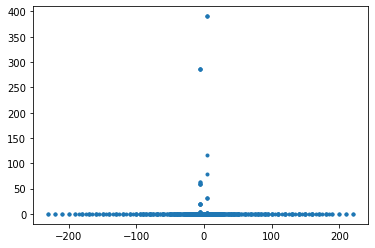

In [25]:
import matplotlib.pyplot as plt

f = AMRgrid_temporary.interpolate(coords)
fig, ax = plt.subplots()
ax.plot(coords[0], f, '.')
plt.show()

## CarpetIOHDF5

In [19]:
ds_hdf5 = CarpetIOHDF5(files)
print("Available dimension:", ds_hdf5.available_dims)
print("All available dimensions:\n------------")
print(ds_ascii)

Available dimension: ['xy', 'xz', 'yz']
All available dimensions:
------------
Available grid function with x dimension:
['H', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'M1', 'M2', 'M3']
Available grid function with y dimension:
['H', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'M1', 'M2', 'M3']
Available grid function with z dimension:
['H', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'M1', 'M2', 'M3']



Then specify variables and their corresponding dim.

**Note: When specify variable name, we just simple filter it by use string `in` method in python.** So you can specify a vector or tensor like following.

In [20]:
var_hdf5 = ds_hdf5.xy['H']

### header

In [21]:
print(var_hdf5.it)

None


In [22]:
# var_hdf5.t

In [23]:
from scipy import ndimage
